In [4]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Set paths
base_path = r"C:\Users\walid\Downloads\signature_t\sign_data_mod_mod"
train_genuine_path = os.path.join(base_path, "train", "GENUINE")
train_forged_path = os.path.join(base_path, "train", "FORGED")
test_genuine_path = os.path.join(base_path, "test", "GENUINE")
test_forged_path = os.path.join(base_path, "test", "FORGED")

IMG_SIZE = 128  # Resize all images to 128x128

def load_images_from_folder(folder, label):
    data = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
        if img is not None:
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            data.append((img, label))
    return data

# Load train data
train_data = []
train_data += load_images_from_folder(train_genuine_path, 1)
train_data += load_images_from_folder(train_forged_path, 0)

# Load test data
test_data = []
test_data += load_images_from_folder(test_genuine_path, 1)
test_data += load_images_from_folder(test_forged_path, 0)

# Shuffle and separate features/labels
def preprocess(data):
    np.random.shuffle(data)
    X = np.array([x[0] for x in data]) / 255.0  # Normalize
    X = X.reshape(-1, IMG_SIZE, IMG_SIZE, 1)    # Add channel dim
    y = np.array([x[1] for x in data])
    return X, y

X_train, y_train = preprocess(train_data)
X_test, y_test = preprocess(test_data)

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Save model
model.save("signature_classifier.h5")


C:\Users\walid\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,391,873 (28.20 MB)

 Trainable params: 7,391,873 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 25s 183ms/step - accuracy: 0.5289 - loss: 0.9427 - val_accuracy: 0.4409 - val_loss: 0.6946
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 21s 163ms/step - accuracy: 0.5752 - loss: 0.6841 - val_accuracy: 0.6242 - val_loss: 0.6335
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 23s 174ms/step - accuracy: 0.6605 - loss: 0.6364 - val_accuracy: 0.6436 - val_loss: 0.6142
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 22s 171ms/step - accuracy: 0.6878 - loss: 0.5680 - val_accuracy: 0.7027 - val_loss: 0.5312
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 21s 159ms/step - accuracy: 0.7565 - loss: 0.4803 - val_accuracy: 0.7069 - val_loss: 0.5181
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 24s 187ms/step - accuracy: 0.7786 - loss: 0.4514 - val_accuracy: 0.7568 - val_loss: 0.4638
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 23s 179ms/step - accuracy: 0.8075 - loss: 0.4081 - val_accuracy: 0.8201 - val_loss: 0.3733
Epoch 8/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 23s 180ms/step - accuracy: 0.8417 - loss: 0

37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step

Classification Report:
              precision    recall  f1-score   support

      FORGED       0.95      0.79      0.86       678
     GENUINE       0.77      0.95      0.85       506

    accuracy                           0.86      1184
   macro avg       0.86      0.87      0.86      1184
weighted avg       0.87      0.86      0.86      1184



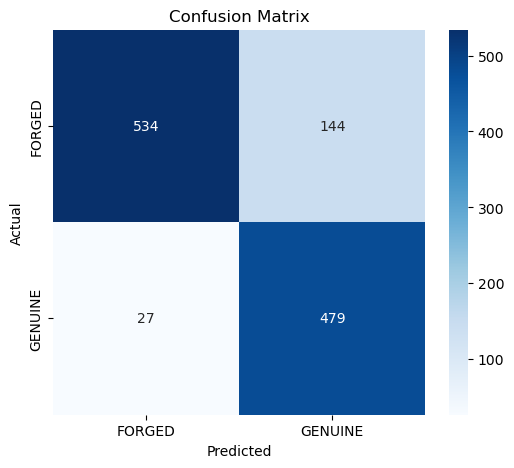

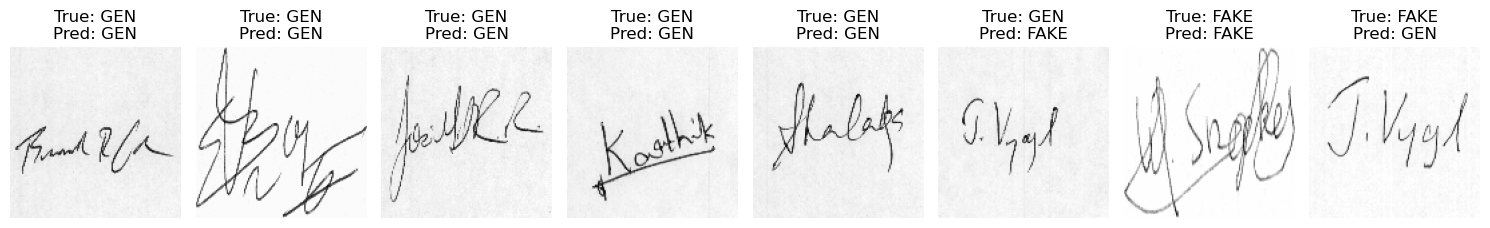

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32").flatten()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["FORGED", "GENUINE"]))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["FORGED", "GENUINE"], yticklabels=["FORGED", "GENUINE"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Visualize some predictions
def show_predictions(X, y_true, y_pred, n=8):
    plt.figure(figsize=(15, 4))
    for i in range(n):
        idx = np.random.randint(0, len(X))
        plt.subplot(1, n, i + 1)
        plt.imshow(X[idx].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
        plt.title(f"True: {'GEN' if y_true[idx]==1 else 'FAKE'}\nPred: {'GEN' if y_pred[idx]==1 else 'FAKE'}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_predictions(X_test, y_test, y_pred, n=8)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


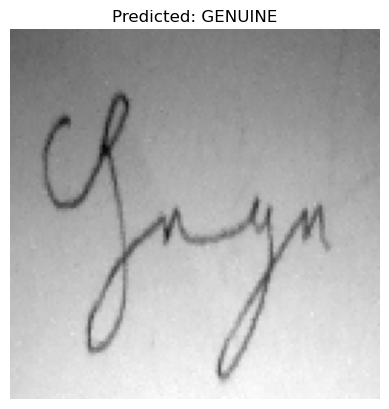

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Path to your image (change the filename as needed)
img_path = r"C:\Users\walid\Downloads\walid forged 2.png"  # Change this to your actual path

# Constants (you should match these to your model's expected input)
IMG_SIZE = 128  # Or whatever size your model expects
IMG_CHANNELS = 1  # 1 for grayscale, 3 for RGB — change if needed

# Load and preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, color_mode='grayscale', target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # normalize
    img_array = np.expand_dims(img_array, axis=0)  # batch dimension
    return img_array

# Make prediction
img_array = preprocess_image(img_path)
prediction = model.predict(img_array)[0][0]
predicted_label = "GENUINE" if prediction > 0.5 else "FORGED"

# Show result
plt.imshow(img_array[0].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


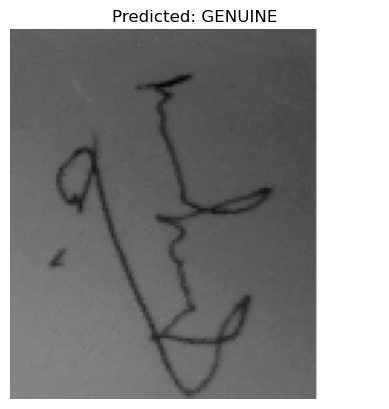

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Path to your image (change the filename as needed)
img_path = r"C:\Users\walid\Downloads\forged walid.png"  # Change this to your actual path

# Constants (you should match these to your model's expected input)
IMG_SIZE = 128  # Or whatever size your model expects
IMG_CHANNELS = 1  # 1 for grayscale, 3 for RGB — change if needed

# Load and preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, color_mode='grayscale', target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # normalize
    img_array = np.expand_dims(img_array, axis=0)  # batch dimension
    return img_array

# Make prediction
img_array = preprocess_image(img_path)
prediction = model.predict(img_array)[0][0]
predicted_label = "GENUINE" if prediction > 0.5 else "FORGED"

# Show result
plt.imshow(img_array[0].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


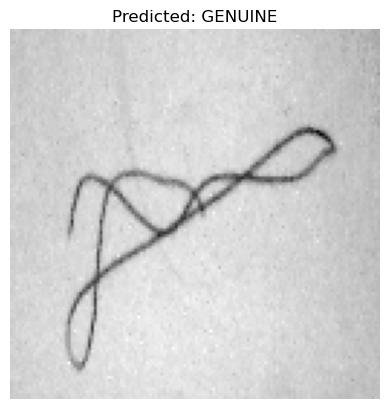

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Path to your image (change the filename as needed)
img_path = r"C:\Users\walid\Downloads\forged 3.png"  # Change this to your actual path

# Constants (you should match these to your model's expected input)
IMG_SIZE = 128  # Or whatever size your model expects
IMG_CHANNELS = 1  # 1 for grayscale, 3 for RGB — change if needed

# Load and preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, color_mode='grayscale', target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # normalize
    img_array = np.expand_dims(img_array, axis=0)  # batch dimension
    return img_array

# Make prediction
img_array = preprocess_image(img_path)
prediction = model.predict(img_array)[0][0]
predicted_label = "GENUINE" if prediction > 0.5 else "FORGED"

# Show result
plt.imshow(img_array[0].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()
